# 소상공인 데이터 EDA

- [인턴 가이드라인 참고](https://docs.google.com/document/d/1KRiulTfb3bxYLVlpN6vfGD-cU5dF-siaO-ZXTKAzLwI/edit?usp=sharing)
- 코드 작성자 : 손범준
- 코드 작성일 : 2023-07-07
- 데이터 출처 : 국가중점데이터-상권정보 데이터(https://www.data.go.kr/data/15083033/fileData.do)
- 데이터 분석 목적 : flask, vue 웹 페이지 구현을 위한 데이터 EDA

----

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df_copy = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202303.csv")

C:\Users\beomj\AppData\Local\Temp\ipykernel_21560\3775597450.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_copy = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202303.csv")


In [8]:
df = df_copy

In [9]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [10]:
df['상권업종대분류코드'].unique()

array(['I2', 'I1', 'P1', 'M1', 'G2', 'N1', 'S2', 'L1', 'R1', 'Q1'],
      dtype=object)

In [11]:
df['상권업종대분류명'].unique()

array(['음식', '숙박', '교육', '과학·기술', '소매', '시설관리·임대', '수리·개인', '부동산',
       '예술·스포츠', '보건의료'], dtype=object)

In [12]:
df['상권업종대분류코드'].unique() + df['상권업종대분류명'].unique()

array(['I2음식', 'I1숙박', 'P1교육', 'M1과학·기술', 'G2소매', 'N1시설관리·임대', 'S2수리·개인',
       'L1부동산', 'R1예술·스포츠', 'Q1보건의료'], dtype=object)

In [13]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

----

In [14]:
def search_business(df):
    business_name = input("상호명을 입력하세요 :")
    result = df[df['상호명'] == business_name]
    result = result[['상호명', '상권업종대분류코드', '상권업종대분류명', '도로명주소', '지번주소', '경도', '위도']]  # 원하는 컬럼만 선택합니다.
    return result


In [15]:
print(search_business(df))

       상호명 상권업종대분류코드 상권업종대분류명                 도로명주소                  지번주소  \
4      토끼정        I2       음식     서울특별시 강서구 마곡동로 55  서울특별시 강서구 마곡동 774-12   
63612  토끼정        I2       음식  서울특별시 종로구 대학로8가길 133   서울특별시 종로구 동숭동 1-132   
89382  토끼정        I2       음식   서울특별시 마포구 잔다리로2길 13   서울특별시 마포구 서교동 366-4   

               경도         위도  
4      126.833022  37.560053  
63612  127.003506  37.580114  
89382  126.920679  37.551706  


----

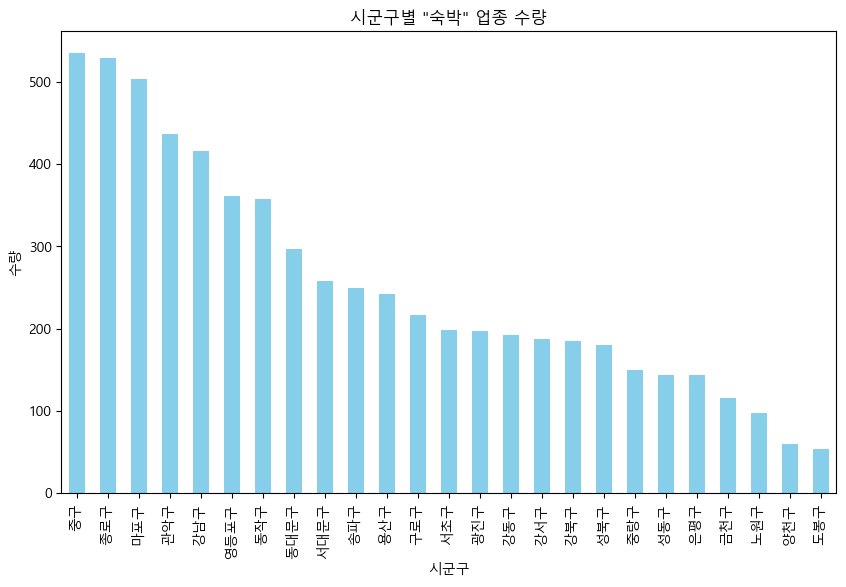

In [23]:

# 업종별로 시군구의 수량을 계산하는 함수
def count_business(df, business_category):
    # 선택된 업종의 데이터만 필터링
    selected_df = df[df['상권업종대분류명'] == business_category]

    # 시군구별로 해당 업종의 수량 계산
    counts = selected_df['시군구명'].value_counts()

    return counts

# 업종을 선택하고, 그에 따른 시군구별 수량 계산
#['I2음식', 'I1숙박', 'P1교육', 'M1과학·기술', 'G2소매', 'N1시설관리·임대', 'S2수리·개인', 'L1부동산', 'R1예술·스포츠', 'Q1보건의료']
business_category = '숙박'  # 여기에 원하시는 업종을 입력하세요.
counts = count_business(df, business_category)

# 그래프 그리기
plt.figure(figsize=(10,6))
counts.plot(kind='bar', color='skyblue')
plt.title(f'시군구별 "{business_category}" 업종 수량')
plt.xlabel('시군구')
plt.ylabel('수량')
plt.show()